# Project: Wrangling and Analyze Data

## Table des matières
* [Data Gathering](#data_gathering)
* [Assessing Data](#assessing_data)
    * [Quality issues](#quality_issues)
    * [Tidiness issues](#tidiness_issues)
* [Cleaning Data](#cleaning_data)
    * [Tidiness issues](#tidiness_issues_1)
        * [Issue 1](#tidiness_issue_1)
        * [Issue 2](#tidiness_issue_2)    
    * [Quality issues](#quality_issues_1)
        * [Issue 1](#qual_issue_1)
        * [Issue 2](#qual_issue_2)
        * [Issue 3](#qual_issue_3)
        * [Issue 4](#qual_issue_4)
        * [Issue 5](#qual_issue_5)
        * [Issue 6](#qual_issue_6)
        * [Issue 7](#qual_issue_7)
        * [Issue 8](#qual_issue_8)  
* [Storing Data](#storing_data)
* [Analyzing and Visualizing Data](#analyzing_data)

<a class="anchor" id="data_gathering"></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
import json
from os.path import exists as file_exists
from timeit import default_timer as timer
from pandas import testing as tm
%matplotlib inline

In [2]:
# Charger les données d'archives
dogs_rating = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Récupérer les données de prédictions d'images
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv','wb') as file:
    file.write(response.content)

In [4]:
# Charger les données de prédictions d'images
image_predictions = pd.read_csv('image_predictions.tsv',sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Code du Tweeter API fourni par le projet
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = dogs_rating.tweet_id.values
len(tweet_ids)

2356

In [7]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Ne pas exécuter le bloc interne si le fichier tweet_json.txt exist déjà
if not file_exists('tweet_json.txt') :
    # Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [8]:
# Chargement des données additionnelles
# Liste de dictionnaires à construire et à convertir en DataFrame
df_list = []
with open('tweet_json.txt') as file:
    # Lire le fichier ligne par ligne
    for line in file:
        # Convertir le contenu de la ligne lue (du json string) en un dictionnaire python
        data = json.loads(line)
        # Ajouter les éléments du dictionnaire à la liste précédemment créée
        df_list.append({'tweet_id': data['id'],
                       'retweet_count' : data['retweet_count'],
                       'favorite_count': data['favorite_count']})

# Créer le DataFrame à partir de la liste de dictionnaires df_list         
additional_data = pd.DataFrame(df_list, columns=['tweet_id','retweet_count','favorite_count'])

<a class="anchor" id="assessing_data"></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
# Aperçu du contenu du DataFrame dogs_rating
dogs_rating

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
# Aperçu du contenu du DataFrame image_predictions
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
# Aperçu du contenu du DataFrame additional_data
additional_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [12]:
dogs_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [14]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
# Vérifier l'unicité des tweet_id dans le tableau dogs_rating
sum(dogs_rating.tweet_id.duplicated())

0

In [16]:
dogs_rating.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1178,719551379208073216,NaN,NaN,2016-04-11 15:43:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harnold. He accidentally opened the fr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719551379...,10,10,Harnold,None,None,None,None
713,784183165795655680,NaN,NaN,2016-10-07 00:06:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Reginald. He's one magical puppo. Aero...,NaN,NaN,NaN,https://vine.co/v/5ghHLBMMdlV,12,10,Reginald,None,None,None,puppo


In [17]:
# Liste des tweet qui sont en fait des retweets
dogs_rating[~dogs_rating.retweeted_status_id.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [18]:
# Retrouver les tweet_ids qui n'ont pas pas de données supplémentaires
tweet_ids = additional_data.tweet_id.values.tolist()
dogs_rating.query('tweet_id not in @tweet_ids')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
815,771004394259247104,NaN,NaN,2016-08-31 15:19:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @katieornah: @dog_rates learning a lot at c...,7.710021e+17,1.732729e+09,2016-08-31 15:10:07 +0000,https://twitter.com/katieornah/status/77100213...,12,10,None,None,None,pupper,None


Ce sont des retweets.

In [19]:
# Vérifier s'il existe des tweets sans note (numérateur)
sum(dogs_rating.rating_numerator.isnull())

0

In [20]:
# Statistiques de la colonne rating_numerator du DataFrame dogs_rating
dogs_rating.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [21]:
# Vérifier s'il existe des tweets sans note (dénominateur)
sum(dogs_rating.rating_denominator.isnull())

0

In [22]:
# Statistiques de la colonne rating_denominator du DataFrame dogs_rating
dogs_rating.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

_min_ de rating_denominator est _0_ ce qui pourrait être un peu embêtant si on devait effectuer des calculs (division par 0)

Essayons de voir dans l'ensemble si tous les numérateur/dénominateur sont correctes

In [23]:
import re 

regex = r'''([+-]?([0-9]+[.])?[0-9]+\/[+-]?([0-9]+[.])?[0-9]+)'''

def get_pattern(pat):
  try:
      return re.findall(regex, pat)[0][0]
  except Exception as e:
      return ''

In [24]:
dogs_rating['pattern'] = dogs_rating['text'].apply(get_pattern)
dogs_rating['fraction'] = dogs_rating['rating_numerator'].astype(str) + '/' + dogs_rating['rating_denominator'].astype(str)
dogs_rating[dogs_rating['pattern'] != dogs_rating['fraction']][['tweet_id','retweeted_status_id','pattern', 'fraction']]

,tweet_id,retweeted_status_id,pattern,fraction
45,883482846933004288,NaN,13.5/10,5/10
313,835246439529840640,NaN,960/00,960/0
340,832215909146226688,7.867091e+17,9.75/10,75/10
387,826598799820865537,NaN,007/10,7/10
695,786709082849828864,NaN,9.75/10,75/10
763,778027034220126208,NaN,11.27/10,27/10
1689,681340665377193984,NaN,9.5/10,5/10
1712,680494726643068929,NaN,11.26/10,26/10
2260,667550882905632768,6.675484e+17,-5/10,5/10


Les fractions numérateur/dénominateur de 09 tweets ne sont pas correctes dont 02 retweets

In [25]:
# Essayons de voir lesquels de ces tweets ont une image
ids = [883482846933004288,835246439529840640,
       826598799820865537,786709082849828864,778027034220126208,
       681340665377193984,680494726643068929]
image_predictions.query('tweet_id in @ids')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
621,680494726643068929,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True
1459,778027034220126208,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1515,786709082849828864,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
2033,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True


Seulement 4 de ces tweets ont une image.

In [26]:
ids = [680494726643068929,778027034220126208,786709082849828864,883482846933004288]
dogs_rating.query('tweet_id in @ids')[['tweet_id','retweeted_status_id','pattern', 'fraction']]

,tweet_id,retweeted_status_id,pattern,fraction
45,883482846933004288,NaN,13.5/10,5/10
695,786709082849828864,NaN,9.75/10,75/10
763,778027034220126208,NaN,11.27/10,27/10
1712,680494726643068929,NaN,11.26/10,26/10


In [27]:
# Valeurs et effectifs correspondant de la colonne doggo
dogs_rating.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [28]:
# Valeurs et effectifs correspondant de la colonne floofer
dogs_rating.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [29]:
# Valeurs et effectifs correspondant de la colonne pupper
dogs_rating.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [30]:
# Valeurs et effectif correspondant de la colonne puppo
dogs_rating.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [31]:
# Vérifier s'il n'y a pas de doublons sur les tweet_id du DataFrame image_predictions
sum(image_predictions.tweet_id.duplicated())

0

In [32]:
# Statistiques du DataFrame image_predictions
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Quality issues <a id='quality_issues'></a>

1. Certains tweets de `dogs_rating` sont des retweets  (colonne `retweeted_status_id` non nulle)

2. Données manquantes dans le tableau image_predictions (2075 au lieu de 2356).

3. Le tableau image_predictions peut être décomposer en deux tableaux (images et prédictions)

4. Le nom des races de chiens prédites est tantôt en majuscule tantôt en minuscule: tableau `image_predictions`.

5. Des tweets ont une fraction numérateur/dénominateur incorrectes.

6. Des chiens dont le nom n'a pas été identifié ou articles `(a, an, the et autres)` figurant en lieu et place des noms.

7. La colonne timestamp du tableau dogs_rating est de type object au lieu de datetime.

8. Les données manquantes dans les colonnes `retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp` du DataFrame  `dogs_rating`  

### Tidiness issues <a id='tidiness_issues'></a>
1. Les stades des chiens (doggo,floofer,pupper,puppo) peuvent être représentés par une seule variable (stade)

2. Le tableau `additional_data` devrait faire partie intégrante du tableau `dogs_rating`

## Cleaning Data <a id="cleaning_data"></a>
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [33]:
# Make copies of original pieces of data
dogs_rating_clean = dogs_rating.copy()
image_predictions_clean = image_predictions.copy()
additional_data_clean = additional_data.copy()

Les fonctions qui suivent permettent de personnaliser le comportement par défaut des tests pandas. En effet pandas fournit uniquement des méthodes de tests d'égalités. Alors pour éviter des erreurs de tests ne s'affichent n'importe comment dans le code, nous implémentons les méthodes qui suivent, lesquelles sont les équivalents inégaux des méthodes de tests prévues par pandas.    

In [34]:
# Permet de tester si 2 DataFrames ne sont pas égaux
def assert_frame_not_equal(*args, **kwargs):
    try:
        tm.assert_frame_equal(*args, **kwargs)
    except AssertionError:
        # frames are not equal
        pass
    else:
        # frames are equal
        raise AssertionError 

In [35]:
# Permet de tester si 2 Series ne sont pas égales
def assert_series_not_equal(*args, **kwargs):
    try:
        tm.assert_series_equal(*args, **kwargs)
    except AssertionError:
        # frames are not equal
        pass
    else:
        # frames are equal
        raise AssertionError 

In [36]:
# Permet de tester si 2 Index ne sont pas égaux
def assert_index_not_equal(*args, **kwargs):
    try:
        tm.assert_index_equal(*args, **kwargs)
    except AssertionError:
        # frames are not equal
        pass
    else:
        # frames are equal
        raise AssertionError 

> Comme il a été recommandé dans le cours, nous allons commencer le nettoyage avec les problèmes d'ordre et ensuite attaquer les problèmes de qualité 

### Tidiness issues <a id='tidiness_issues_1'></a>

#### Issue #1: Les stades des chiens (doggo,floofer,pupper,puppo) peuvent être représentés par une seule variable (stade)<a id='tidiness_issue_1'></a>

#### Define
Créer une nouvelle colonne `stade` qui va contenir la valeur du stade de chaque chien, puis supprimer les anciennes 

#### Test pré-nettoyage

In [37]:
old_columns = dogs_rating_clean.columns
old_columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'pattern', 'fraction'],
      dtype='object')

#### Code

In [38]:
# Composer les valeurs de la colonne stade par concaténation des valeurs de chaque colonne.
dogs_rating_clean['stade'] = dogs_rating_clean['doggo'].map(str) \
            + dogs_rating_clean['floofer'].map(str) \
            + dogs_rating_clean['pupper'].map(str) \
            + dogs_rating_clean['puppo'].map(str)

# Remplacer les None dans les valeurs par vide
dogs_rating_clean.stade = dogs_rating_clean.stade.str.replace('None','')
# Remettre 'None' à la place des cellules vide
dogs_rating_clean.stade.replace(r'^\s*$', 'None', regex=True, inplace = True)
dogs_rating_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test

In [39]:
new_columns = dogs_rating_clean.columns
assert_index_not_equal(new_columns, old_columns)
new_columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'pattern', 'fraction', 'stade'],
      dtype='object')

#### Issue #2: Le tableau additional_data devrait faire partie intégrante du tableau dogs_rating <a id='tidiness_issue_2'></a>

#### Define:
Fusionner les tableaux dogs_rating_clean et additional_data_clean

#### Test pré-nettoyage

In [40]:
# Colonnes avant nettoyage
old_cols = dogs_rating_clean.columns
old_cols

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'pattern', 'fraction', 'stade'],
      dtype='object')

#### Code

In [41]:
# Fusionner les tableaux dogs_rating_clean et additional_data_clean
dogs_rating_clean = pd.merge(dogs_rating_clean, additional_data_clean, on=['tweet_id'], how='left')

#### Test

In [42]:
# Colonnes après nettoyage
new_cols = dogs_rating_clean.columns
assert_index_not_equal(new_cols, old_cols)
new_cols

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'pattern', 'fraction', 'stade',
       'retweet_count', 'favorite_count'],
      dtype='object')

In [43]:
dogs_rating_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,pattern,fraction,stade,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,13/10,13/10,None,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13/10,13/10,None,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,12/10,12/10,None,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,13/10,13/10,None,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,12/10,12/10,None,9774.0,41048.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,13/10,13/10,None,3261.0,20562.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,13/10,13/10,None,2158.0,12041.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,13/10,13/10,None,16716.0,56848.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,13/10,13/10,None,4429.0,28226.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,14/10,14/10,doggo,7711.0,32467.0


### Quality issues <a id='quality_issues_1'></a>

#### Issue #1: Certains tweets de `dogs_rating` sont des retweets  (colonne `retweeted_status_id` non nulle).<a id='qual_issue_1'></a>

#### Define:
Supprimer les retweets dans les tableaux `dogs_rating_clean`, `image_predictions_clean`.

#### Test pré-nettoyage

In [44]:
# Le DataFrame des retweets
retweets = dogs_rating_clean[~dogs_rating_clean.retweeted_status_id.isna()]
# Liste des retweet_ids à nettoyer
retweet_ids = retweets.tweet_id.values.tolist()
len(retweet_ids)

181

In [45]:
# Faire une copie des DataFrames
data_1 = dogs_rating_clean.copy()
data_2 = image_predictions_clean.copy()

In [46]:
# Tester si les copies sont conformes aux originaux
tm.assert_frame_equal(dogs_rating_clean,data_1)
tm.assert_frame_equal(image_predictions_clean,data_2)

#### Code

In [47]:
# Supprimer l'ensemble des retweets identifiés dans dogs_rating_clean
dogs_rating_clean.drop(retweets.index, inplace=True)
# Supprimer l'ensemble des retweets identifiés dans image_predictions_clean
image_predictions_clean.drop(image_predictions_clean.query('tweet_id in @retweet_ids').index, inplace=True)

#### Test

In [48]:
# Tester que les DataFrames dogs_rating_clean et data_1 ne sont plus égaux
assert_frame_not_equal(dogs_rating_clean, data_1)
# Vérifier que les retweets n'existent plus 
dogs_rating_clean[~dogs_rating_clean.retweeted_status_id.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,pattern,fraction,stade,retweet_count,favorite_count


In [49]:
# Tester que les DataFrames image_predictions_clean et data_2 ne sont plus égaux 
assert_frame_not_equal(image_predictions_clean,data_2)
# Vérifier que le retweets n'existent plus 
image_predictions_clean.query('tweet_id in @retweet_ids')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Issue #2: Données manquantes dans le tableau image_predictions (2075 au lieu de 2356) <a id='qual_issue_2'></a>

#### Define:
Supprimer les tweets qui n'ont pas d'images dans `dogs_rating_clean`.Les prédictions d'images sont importantes pour notre analyse, et nous n'avons aucun moyen de rejouer les prédictions pour les données manquantes du moment où nous n'avons pas accès à l'algorithme de prédiction.

#### Test pré-nettoyage

In [50]:
# Liste des tweet_id à conserver
tweet_ids = image_predictions_clean.tweet_id.values.tolist()
# liste des tweets à supprimer
data_1 = dogs_rating_clean.query('tweet_id not in @tweet_ids')

In [51]:
data_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,pattern,fraction,stade,retweet_count,favorite_count
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,12/10,12/10,None,4.0,117.0
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,14/10,14/10,None,3899.0,20788.0
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/88396...,13,10,None,13/10,13/10,None,21298.0,74423.0
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,17/10,17/10,None,7.0,129.0
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,14/10,14/10,None,10.0,315.0
72,878604707211726852,NaN,NaN,2017-06-24 13:24:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Martha is stunning how h*ckin dare you. 13/10 ...,NaN,NaN,NaN,https://twitter.com/bbcworld/status/8785998685...,13,10,None,13/10,13/10,None,7582.0,30931.0
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/8761629...,14,10,None,14/10,14/10,None,4800.0,23869.0
88,875097192612077568,NaN,NaN,2017-06-14 21:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You'll get your package when that precious man...,NaN,NaN,NaN,https://twitter.com/drboondoc/status/874413398...,13,10,None,13/10,13/10,None,6342.0,27997.0
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,14/10,14/10,doggo,5764.0,21461.0
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,10/10,10/10,None,3.0,121.0


#### Code

In [52]:
# Supprimer les tweets qui n'ont pas d'images dans dogs_rating_clean
dogs_rating_clean.drop(dogs_rating_clean.query('tweet_id not in @tweet_ids').index, inplace=True)

#### Test

In [53]:
# Collecter à nouveau les tweet à supprimer
data_2 = dogs_rating_clean.query('tweet_id not in @tweet_ids')
assert_frame_not_equal(data_2, data_1)

In [54]:
data_2

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,pattern,fraction,stade,retweet_count,favorite_count


#### Issue #3: Le tableau image_predictions peut être décomposer en deux tableaux (images et prédictions). <a id='qual_issue_3'></a>

#### Define:
Scinder le tableau `image_predictions` en 2 tableaux distincts à savoir `images(tweet_id,jpg_url,img_num)`  et `predictions(tweet_id,prediction,race_predite,degre_confiance,race_dog)`

#### Code

In [55]:
# Créer un tableau pour les informations sur les images
images = image_predictions_clean[['tweet_id','jpg_url','img_num']]

# données de la première prédiction
p1 = image_predictions_clean.loc[:,['tweet_id','p1','p1_conf','p1_dog']]
p1.insert(1,'prediction','p1')
p1.rename(columns={'p1': 'race_predite',
          'p1_conf':'degre_confiance',
          'p1_dog':'race_dog'}, inplace=True)

# données de la deuxième prédiction
p2 = image_predictions_clean.loc[:,['tweet_id','p2','p2_conf','p2_dog']]
p2.insert(1,'prediction','p2')
p2.rename(columns={'p2': 'race_predite',
          'p2_conf':'degre_confiance',
          'p2_dog':'race_dog'}, inplace=True)

# données de la troisième prédiction
p3 = image_predictions_clean.loc[:,['tweet_id','p3','p3_conf','p3_dog']]
p3.insert(1,'prediction','p3')
p3.rename(columns={'p3': 'race_predite',
          'p3_conf':'degre_confiance',
          'p3_dog':'race_dog'}, inplace=True)

# Créer le tableau des prédictions
predictions = pd.concat([p1, p2, p3], ignore_index=True)

#### Test

In [56]:
images.sample(5)

,tweet_id,jpg_url,img_num
975,707014260413456384,https://pbs.twimg.com/media/Cc_RsVlXEAIzzlX.jpg,1
301,671497587707535361,https://pbs.twimg.com/media/CVGjflNWoAEwgrQ.jpg,1
38,666644823164719104,https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,1
377,673213039743795200,https://pbs.twimg.com/media/CVe7r7QVEAAc4Bg.jpg,1
286,671151324042559489,https://pbs.twimg.com/media/CVBokRSWsAADuXx.jpg,1


In [57]:
predictions.sample(5)

,tweet_id,prediction,race_predite,degre_confiance,race_dog
2280,671159727754231808,p2,sunglasses,0.062487,False
4682,684481074559381504,p3,polecat,0.017357,False
5785,844223788422217728,p3,Newfoundland,0.038828,True
5612,813142292504645637,p3,Italian_greyhound,0.018611,True
2633,681320187870711809,p2,Eskimo_dog,0.245395,True


In [58]:
# Voir si les valeurs p1, p2 et p3 sont présentes
predictions.prediction.unique()

array(['p1', 'p2', 'p3'], dtype=object)

#### Issue #4: Le nom des races de chiens prédites est tantôt en majuscule tantôt en minuscule (tableau image_predictions). <a id='qual_issue_4'></a> 

#### Define:
Transformer tous les noms des races prédites en majuscule.

#### Code

In [59]:
# Mettre le nom des races en majuscule
predictions.race_predite = predictions.race_predite.str.capitalize()

#### Test

In [60]:
# Vérifier s'il existe encore un nom de race en minuscule
sum(predictions.race_predite.str.islower())

0

In [61]:
predictions.race_predite.sample(10)

5787              Beagle
4573     German_shepherd
917       French_bulldog
1787    Military_uniform
1523              Bakery
3515             Lighter
1584            Pembroke
1317              Geyser
4562             Sundial
586               Kelpie
Name: race_predite, dtype: object

#### Issue #5: Des tweets ont une fraction numérateur/dénominateur incorrectes.<a id='qual_issue_5'></a>

#### Define:
Réaffecter les bonnes valeurs `rating_numerator` et `rating_denominator`. Il s'agit précisément des tweet_id : _680494726643068929, 778027034220126208, 786709082849828864, 883482846933004288_

#### Test pré-nettoyage

In [62]:
ids = [680494726643068929,778027034220126208,786709082849828864,883482846933004288]
old_data = dogs_rating_clean.query('tweet_id in @ids')[['tweet_id','rating_numerator','rating_denominator','pattern', 
                                                        'fraction']]
old_data

,tweet_id,rating_numerator,rating_denominator,pattern,fraction
45,883482846933004288,5,10,13.5/10,5/10
695,786709082849828864,75,10,9.75/10,75/10
763,778027034220126208,27,10,11.27/10,27/10
1712,680494726643068929,26,10,11.26/10,26/10


#### Code

In [63]:
# Affecter les valeurs de pattern à rating_numerator et rating_denominator
dogs_rating_clean['rating_numerator'], dogs_rating_clean['rating_denominator'] = dogs_rating_clean.pattern.str.split('/',1).str
# Reévaluer la fraction
dogs_rating_clean.fraction = dogs_rating_clean.pattern
# Convertir rating_numerator et rating_denominator en float
dogs_rating_clean.rating_numerator = dogs_rating_clean.rating_numerator.astype('float64')
dogs_rating_clean.rating_denominator = dogs_rating_clean.rating_denominator.astype('float64')

#### Test

In [64]:
# Récupérer les nouvelles données
new_data = dogs_rating_clean.query('tweet_id in @ids')[['tweet_id','rating_numerator','rating_denominator','pattern', 
                                                       'fraction']]
# Tester s'il y a une différence
assert_frame_not_equal(new_data, old_data)
new_data

,tweet_id,rating_numerator,rating_denominator,pattern,fraction
45,883482846933004288,13.50,10.0,13.5/10,13.5/10
695,786709082849828864,9.75,10.0,9.75/10,9.75/10
763,778027034220126208,11.27,10.0,11.27/10,11.27/10
1712,680494726643068929,11.26,10.0,11.26/10,11.26/10


#### Issue #6: Des chiens dont le nom n'a pas été identifié (None) ou des articles (a, an, the et autres) figurant en lieu et place des noms. <a id='qual_issue_6'></a>

#### Define:
Remplacer a, an, the, quite,... retrouvés dans la colonne name par 'None'.

#### Test pré-nettoyage

In [65]:
# Liste des noms incorrectes
old_names = dogs_rating_clean.query("name in ['a','an','the','quite']").name
len(old_names)

71

#### Code

In [66]:
# Remplacer les noms incorrectes par none
dogs_rating_clean.replace(dict.fromkeys(['a','an','the','quite'],'None'),inplace=True)

#### Test

In [67]:
new_names = dogs_rating_clean.query("name in ['a','an','the','quite']").name
assert_series_not_equal(new_names, old_names)
len(new_names)

0

#### Issue #7: La colonne timestamp du tableau dogs_rating est de type object au lieu de datetime. <a id='qual_issue_7'></a>

#### Define:
Convertir timestamp en datetime.

#### Test pré-nettoyage

In [68]:
old_type = dogs_rating_clean.timestamp.dtype
old_type

dtype('O')

#### Code

In [69]:
dogs_rating_clean.timestamp = dogs_rating_clean.timestamp.astype('datetime64[ns]')

#### Test

In [70]:
new_type = dogs_rating_clean.timestamp.dtype
assert new_type != old_type
new_type

dtype('<M8[ns]')

#### Issue #8: Les données manquantes dans les colonnes `retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp` du DataFrame  `dogs_rating`. <a id='qual_issue_8'></a>

#### Define:
Supprimer les colonnes mentionnées. Nous ne nous intéressons pas aux retweets

#### Test pré-nettoyage

In [71]:
old_cols = dogs_rating_clean.columns
old_cols

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'pattern', 'fraction', 'stade',
       'retweet_count', 'favorite_count'],
      dtype='object')

#### Code

In [72]:
# Supprimer les colonnes
dogs_rating_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [73]:
new_cols = dogs_rating_clean.columns
# Tester que les colonnes n'existent plus
assert_index_not_equal(new_cols, old_cols)
new_cols

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'pattern', 'fraction', 'stade',
       'retweet_count', 'favorite_count'],
      dtype='object')

## Storing Data <a id='storing_data'></a>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [74]:
# Fusionner les tableaux dogs_rating_clean et images pour constituer un seul master data
dogs_rating_clean = pd.merge(dogs_rating_clean, images, on='tweet_id', how='left')

In [75]:
# Sauvegarder les données de dogs_rating_clean dans le fichier twitter_archive_master.csv
dogs_rating_clean.to_csv('twitter_archive_master.csv', index=False)

In [76]:
# Sauvegarder les prédictions dans le fichier 'predictions_clean.csv'
predictions.to_csv('predictions_clean.csv', index=False)

## Analyzing and Visualizing Data <a class='anchor' id='analyzing_data'></a>
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

Les tableaux utilisés pour l'analyse et la visualisation sont ceux résultants du nettoyage des données à savoir `dogs_rating_clean` et `predictions`. `dogs_rating_clean` représente le ***master data*** et comporte les données d’archives améliorées, les données additionnelles collectées et les données sur les images utilisées pour les prédictions. Le tableau `predictions` comporte les données sur les prédictions successives des images associées à chaque tweet

L'analyse sera guidée par les 3 questions suivantes:
* _Quelles sont les 10 races de chiens les plus prédites ?_
* _Quelles sont les 10 races de chiens les mieux notées ?_
* _Quelles sont les 10 races de chiens les plus appréciées ?_  

#### Quelles sont les 10 races de chiens les plus prédites ?

L'objectif ici est d'obtenir un classement des races de chiens les plus récurrentes dans les prédictions, en particulier le Top 10 

In [77]:
# Top 10 des races les plus prédites
top_10_races = predictions.groupby('race_predite') \
        .agg({'tweet_id':'size','degre_confiance':'mean'}) \
        .rename(columns={'tweet_id':'nombre','degre_confiance':'moy_degre_confiance'}) \
        .sort_values(by='nombre', ascending=False) \
        .reset_index()[:10]
top_10_races

,race_predite,nombre,moy_degre_confiance
0,Golden_retriever,267,0.440334
1,Labrador_retriever,267,0.295863
2,Chihuahua,179,0.301717
3,Pembroke,139,0.493104
4,Cardigan,113,0.191414
5,Pomeranian,104,0.334555
6,Toy_poodle,103,0.295065
7,Chow,92,0.323624
8,Pug,92,0.476665
9,French_bulldog,90,0.291677


#### Quelles sont les 10 races de chiens les mieux notées ?

On veut ici obtenir un classement du Top 10 des races de chiens les mieux notées.

In [78]:
# Fusionner les tableaux dogs_rating_clean et predictions
data = pd.merge(dogs_rating_clean, predictions, on='tweet_id')
# Regrouper par races en calculant le nombre d'occurences,  la note moyenne
# et la somme des totale des retweets et favoris   
rated_races = data.groupby('race_predite') \
        .agg({'tweet_id':'size',
              'rating_numerator':'median',
              'retweet_count' : 'sum',
              'favorite_count':'sum'
             }) \
        .rename(columns={'tweet_id':'nombre',
                         'rating_numerator':'median_rating',
                         'retweet_count':'total_retweet',
                         'favorite_count':'total_favoris'
                        }) \
        .reset_index()
# Afficher le Top 10 des races dans l'ordre décroissant des notes médianes  
rated_races.sort_values(by='median_rating', ascending=False)[:10]

,race_predite,nombre,median_rating,total_retweet,total_favoris
540,Sunglass,2,893.0,5017.0,10447.0
349,Microphone,1,420.0,4324.0,7989.0
2,Accordion,1,420.0,4324.0,7989.0
187,Drumstick,1,420.0,4324.0,7989.0
91,Breakwater,1,204.0,1434.0,4196.0
164,Crib,1,144.0,1104.0,3323.0
436,Printer,3,14.0,22199.0,91181.0
396,Palace,1,14.0,21794.0,49960.0
351,Military_uniform,1,14.0,4168.0,13755.0
383,Orangutan,1,14.0,6295.0,17474.0


Aucune des races identifiées précédemment (top 10 des races prédites) ne figure dans cette liste. Plus encore les noms qui apparaîssent (Sunglass, Accordion, Drumstick, ...) ne sont pas des noms de races de chiens, leurs occurences sont très faibles avec des notes moyennes fantaisistes. Un nettoyage supplémentaire du tableau des prédictions d'images serait nécessaire. Pour ce faire il nous faudra non seulement identifier tous les noms incorrectes présents dans le tableau, mais aussi disposer d'une liste du noms de toutes les races de chiens connues; ce qui serait fastidieux. Alors pour parvenir à notre résultat, nous allons utiliser une mesure que nous appellerons **`rating_ratio`**, quotient du nombre d'occurrence et de la médiane des notes de chaque race. **`rating_ratio = nombre/median_rating`**     

In [79]:
# Ajouter la mesure rating_ratio au tableau
rated_races['rating_ratio'] = rated_races.nombre/rated_races.median_rating
rated_races.sort_values(by='rating_ratio', ascending=False)[:10]

,race_predite,nombre,median_rating,total_retweet,total_favoris,rating_ratio
517,Space_shuttle,1,0.0,336.0,3168.0,inf
229,Golden_retriever,267,12.0,909592.0,2977035.0,22.250000
307,Labrador_retriever,267,12.0,998813.0,3309237.0,22.250000
125,Chihuahua,179,11.0,458555.0,1494041.0,16.272727
410,Pembroke,139,12.0,461786.0,1614655.0,11.583333
427,Pomeranian,104,11.0,404424.0,1141341.0,9.454545
112,Cardigan,113,12.0,392957.0,1336994.0,9.416667
573,Toy_poodle,103,11.0,246529.0,737377.0,9.363636
440,Pug,92,10.0,238926.0,785611.0,9.200000
214,French_bulldog,90,10.5,258258.0,927795.0,8.571429


**`Space_shuttle`** est la race qui vient en tête mais sa note médiane est _0_, ce qui pose un problème pour le cacul du quotient (division par 0).
Il convient donc de l'éliminer.

In [80]:
# Supprimer toutes les rated_races dont la note médiane est inférieure à 0.
rated_races.drop(rated_races[rated_races.median_rating <= 0].index, inplace=True)

In [81]:
# Liste du top 10 des races les mieux notées.
top_10_rated_races = rated_races.sort_values(by='rating_ratio', ascending=False).reset_index()[:10]
top_10_rated_races[['race_predite','nombre','median_rating','rating_ratio']]

,race_predite,nombre,median_rating,rating_ratio
0,Golden_retriever,267,12.0,22.250000
1,Labrador_retriever,267,12.0,22.250000
2,Chihuahua,179,11.0,16.272727
3,Pembroke,139,12.0,11.583333
4,Pomeranian,104,11.0,9.454545
5,Cardigan,113,12.0,9.416667
6,Toy_poodle,103,11.0,9.363636
7,Pug,92,10.0,9.200000
8,French_bulldog,90,10.5,8.571429
9,Chesapeake_bay_retriever,87,11.0,7.909091


On retrouve à quelques exceptions près le même classement que précédemment.

In [82]:
# Statistiques des notes de la race 'Golden_retriever' et 'Labrador_retriever'
# Race 'Golden_retriever'
stats_1 = pd.DataFrame(data[data.race_predite == 'Golden_retriever'].rating_numerator.describe())
# Race 'Labrador_retriever'
stats_2 = pd.DataFrame(data[data.race_predite == 'Labrador_retriever'].rating_numerator.describe())
# Renommer les en-tête de colonne
stats_1.rename(columns={'rating_numerator':'Golden_retriever'}, inplace=True)
stats_1.rename(columns={'rating_numerator':'Labrador_retriever'}, inplace=True)
# Joindre les tableaux
stats = pd.concat([stats_1, stats_2], axis=1)
stats

,Golden_retriever,rating_numerator
count,267.000000,267.000000
mean,12.923221,12.387640
std,11.349816,10.782562
min,5.000000,5.000000
25%,11.000000,10.000000
50%,12.000000,12.000000
75%,12.000000,12.000000
max,143.000000,165.000000


Le résultat se confirme, `Golden_retriever` reçoit une meilleure note moyenne, **_12,89_** vs **_12,36_** pour `Labrador_retriever`

#### Quelles sont les 10 races de chiens les plus appréciées ?

In [83]:
# Liste du top 10 des races de chiens qui comptent plus de favoris
top_10_favorite_races = rated_races.sort_values(by='total_favoris', ascending=False).reset_index()[:10]
top_10_favorite_races[['race_predite','total_favoris']]

,race_predite,total_favoris
0,Labrador_retriever,3309237.0
1,Golden_retriever,2977035.0
2,Pembroke,1614655.0
3,Chihuahua,1494041.0
4,Cardigan,1336994.0
5,Pomeranian,1141341.0
6,French_bulldog,927795.0
7,Cocker_spaniel,882095.0
8,Chesapeake_bay_retriever,864969.0
9,Chow,824821.0


### Insights:
1. `Golden_retriever` occupe la tête du classement des races de chiens les plus récurrentes dans les prédictions. Elle apparaît à 267 reprises avec un degé de confiance moyen de **44%**, toutes prédictions confondues.

2. On retrouve à quelques exceptions près le même classement lorsqu'on veut voir les races de chiens qui on obtenues globalement les meilleures notes.  `Golden_retriever` et `Labrador_retriever` se partagent la tête de liste avec **_12_** comme notes médianes et **_22,25_** chancune pour rating_ratio, avec un avantage pour  `Golden_retriever` qui reçoit une meilleure note moyenne **_12,89_** vs **_12,36_**; suivi de `Chihuahua`..

3. Dans le classement du Top 10 des races de chiens les plus appréciées en revanche, `Labrador_retriever` qui occupait jusque-là la deuxième place, vient en tête avec **3,3M** de favoris. `Chesapeake_bay_retriever` n'apparaît pas dans le Top 10 des races de les plus récurrentes dans les prédictions mais occupe la **10<sup>ième</sup>** et la **9<sup>ième</sup>** position respectivement dans les races les mieux notées et les races les plus appréciées.

### Visualization

Dans cette partie nous allons visualiser côte à côte le graphe du top 10 des races les mieux notés et celui des races les plus appréciées

In [84]:
# Définir les valeurs de style à utiliser pour les visualisations
sns.set_context("talk")
sns.set_style("whitegrid")
colors = sns.color_palette('tab10')

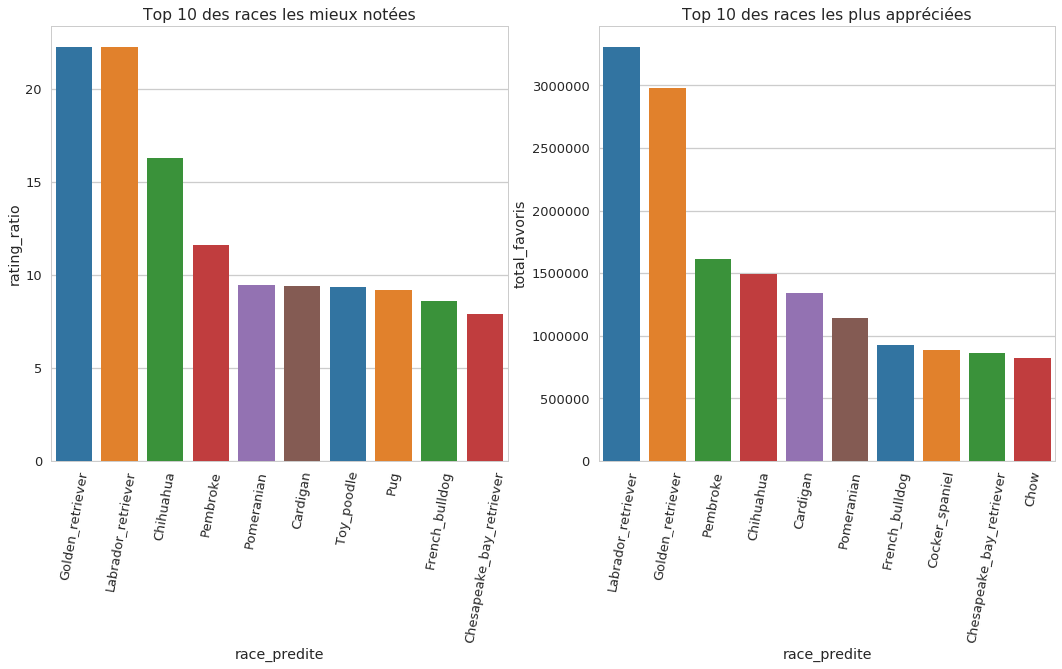

In [85]:
# Graphique du top 10 des races de chiens les mieux notées et les plus appréciées
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
# Top 10 des races de chiens les mieux notées
bar_plot_1 = sns.barplot(data=top_10_rated_races,
            x='race_predite', 
            y='rating_ratio', 
            palette = colors, ax=axes[0])
bar_plot_1.set_xticklabels(bar_plot_1.get_xticklabels(),rotation=80)
axes[0].set_title('Top 10 des races les mieux notées')

# Top 10 des races de chiens favoris
bar_plot_2 = sns.barplot(data=top_10_favorite_races,
            x='race_predite', 
            y='total_favoris', 
            palette = colors, ax=axes[1])
bar_plot_2.set_xticklabels(bar_plot_2.get_xticklabels(),rotation=80)
axes[1].set_title('Top 10 des races les plus appréciées')
plt.show()